# Table of Contents
<div class="lev1 toc-item"><a href="#Exercise-2.1.-Minimizing-a-quadratic-function-and-the-curse-of-dimensionality" data-toc-modified-id="Exercise-2.1.-Minimizing-a-quadratic-function-and-the-curse-of-dimensionality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 2.1. Minimizing a quadratic function and the curse of dimensionality</a></div><div class="lev1 toc-item"><a href="#Exercise-2.2.-Implementing-random-search-in-Python" data-toc-modified-id="Exercise-2.2.-Implementing-random-search-in-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 2.2. Implementing random search in Python</a></div><div class="lev1 toc-item"><a href="#Exercise-2.3.-Using-random-search-to-minimize-a-nonconvex-function" data-toc-modified-id="Exercise-2.3.-Using-random-search-to-minimize-a-nonconvex-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 2.3. Using random search to minimize a nonconvex function</a></div><div class="lev1 toc-item"><a href="#Exercise-2.4.-Random-search-with-diminishing-steplength" data-toc-modified-id="Exercise-2.4.-Random-search-with-diminishing-steplength-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2.4. Random search with diminishing steplength</a></div><div class="lev1 toc-item"><div class="lev1 toc-item"><a href="#Exercise-2.8.-Coordinate-search-applied-to-minimize-a-simple-quadratic" data-toc-modified-id="Exercise-2.8.-Coordinate-search-applied-to-minimize-a-simple-quadratic-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 2.8. Coordinate search applied to minimize a simple quadratic</a></div><div class="lev1 toc-item"><a href="#Exercise-2.9.-Coordinate-search-with-diminishing-steplength" data-toc-modified-id="Exercise-2.9.-Coordinate-search-with-diminishing-steplength-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 2.9. Coordinate search with diminishing steplength</a></div><div class="lev1 toc-item"></div>

In [1]:
# import basic libraries and autograd wrapped numpy
import autograd.numpy as np
import copy
import matplotlib.pyplot as plt


# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# Exercise 2.1. Minimizing a quadratic function and the curse of dimensionality

In this experiment you will verify the *curse of dimensionality* issue associated with the use of randomly sampled points for naive evaluation for the simple quadratic function

$$
g(\mathbf{w}) = \mathbf{w}^T\mathbf{w}
$$

whose minimum is always $g(\mathbf{0}_{N\times 1}) = 0$ regardless of the input dimension $N$.

Here you need to create a range of these quadratics for input dimension $N=1$ to $N = 100$.  Below you will find a Python function defining such a quadratic for general input dimension $N$.

In [2]:
# a function defining a a simple, N dimensional quadratic function g(\mathbf{w}) = \mathbf{w}^T\mathbf{w}
def quadratic(x):
    return np.dot(x.T,x)

You can evaluate this function using any (real) input you like.  Some examples are given below.

In [3]:
# an example where N=1
x=np.array([1])
print('an N=1 example=> here x=np.array([1]), and quadratic(x)=',quadratic(x))

# an example where N=4
x = np.array([1,2,3,4])
print('an N=4 example=> here x=np.array([1,2,3,4]), and quadratic(x)=',quadratic(x))

an N=1 example=> here x=np.array([1]), and quadratic(x)= 1
an N=4 example=> here x=np.array([1,2,3,4]), and quadratic(x)= 30


Now you want to sample the input space of each quadratic of this kind for dimensions $N=1,..,100$ a total of $10,000$ times each, randomly and uniformly on the hypercube $[-1,1]\times [-1,1] \times \cdots \times [-1,1]$ (this hypercube has $N$ sides).  

You can produce a random number on the interval $[-1,1]$ as shown below.

In [4]:
# a random number on the interval [-1,1]
2*np.random.rand(1)-1

array([-0.15100357])

If you need to create an $N$ dimensional version of this - you can use the general pattern below.

In [5]:
# a vector of dimension N where each entry is randomly chosen on the interval [-1,1]
N=4
2*np.random.rand(1,4)-1

array([[-0.75243197,  0.83387062,  0.19896729, -0.54786614]])

With these components in had, generate a plot illustrating the value of this quadratics of dimension $N=100$, $N=1000$, and $N=10000$ by sampling  $100$, $1,000$, and $10,000$ times respectively and averaging. See the text of this problem for further details.

In [6]:
# Plot minimum of N,P
def plot_min(x, y, title, shape='s-', color='r', label=None):
    plt.plot(x, y, shape, color = color, label=label)
    plt.xlabel("N-dimension")
    plt.ylabel("Minimum qudratic")
    plt.title(title)
    plt.legend(loc='best')
    plt.plot()


In [7]:
# Sample P for N
def sample(N, P, samp):
    min_val = 1000000
    for i in range(P):
        if samp == "uniform":
            w = np.random.uniform(-1, 1, (N, 1))
            
        else:
            w = np.random.rand(N, 1)
        min_val = min(min_val, quadratic(w).item())
    return min_val

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


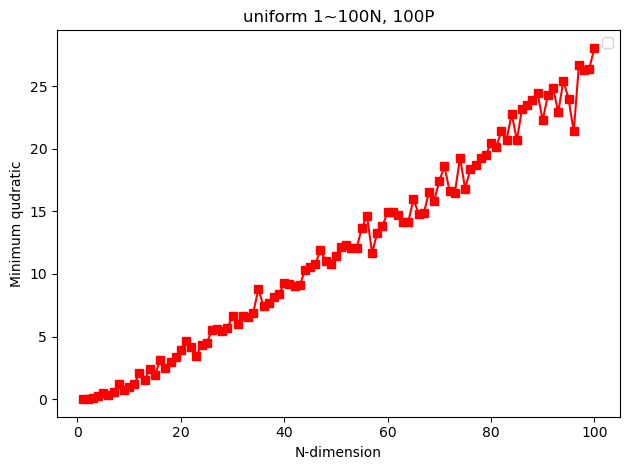

In [8]:
# Question a
x = np.arange(1, 101)
y = [sample(N, 100, "uniform") for N in range(1, 101)]
plot_min(x, y, "uniform 1~100N, 100P")

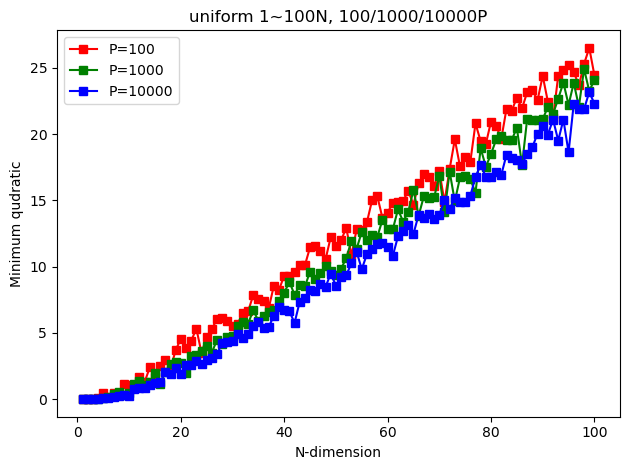

In [9]:
# Question b
x = np.arange(1, 101)
shape = ['s-', 's-', 's-']
color = ['r', 'g', 'b']
label = ["P=100", "P=1000","P=10000"]
for i, P in enumerate([100, 1000, 10000]):
    y = [sample(N, P, "uniform") for N in range(1, 101)]
    plot_min(x, y, f"uniform 1~100N, 100/1000/10000P", shape[i], color[i], label[i])


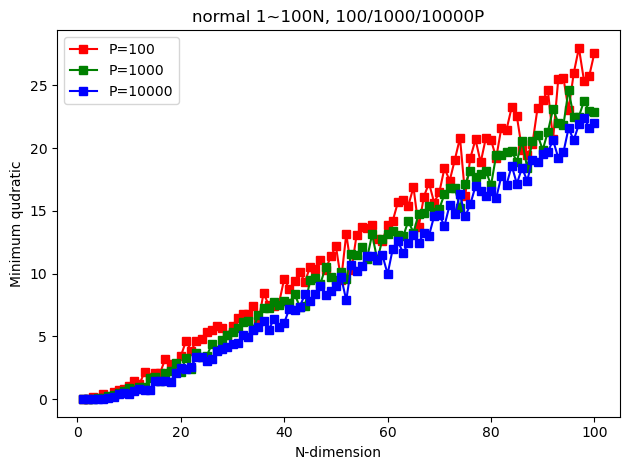

In [10]:
# Question c
x = np.arange(1, 101)
shape = ['s-', 's-', 's-']
color = ['r', 'g', 'b']
label = ["P=100", "P=1000","P=10000"]
for i, P in enumerate([100, 1000, 10000]):
    y = [sample(N, P, "normal") for N in range(1, 101)]
    plot_min(x, y, f"normal 1~100N, 100/1000/10000P", shape[i], color[i], label[i])

# Exercise 2.4. Random search with diminishing steplength

Use the random search algorithm to minimize a famous optimization test function called the *Rosenbrock function* which takes the form

\begin{equation}
g\left(w_0,w_1\right) = 100\left(w_1 - w_0^2\right)^2 + \left(w_0 - 1\right)^2.
\end{equation}

This function (whose contour plot is shown in the text) has a global minimum at the point $\mathbf{w}^{\star} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ located in a very narrow and curved valley.

Now we make the same run but use the diminishing steplength rule $\alpha = \frac{1}{k}$. 

In [11]:
# loss function
def loss(w):
    w0 = w[0]
    w1 = w[1]
    return 100 * (w1-w0**2)**2 + (w0-1)**2

In [12]:
# 1 step of random seart
def step(w, p, k=1, g=loss):
    min_val = g(w)
    min_dir = None
    for i in range(p):
        d = np.random.randn(*w.shape)
        d = d / np.linalg.norm(d)
        if (min_dir is None or g(w+1/k * d) < min_val):
            min_val = g(w+1/k * d)
            min_dir = d
    return w + 1/k * min_dir, min_val

        

In [13]:
# Plot history curve
def plot_hist(x, y, title=None, shape='s-', color='r', label=None):
    plt.plot(x, y, shape, color = color, label=label)
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.title(title)
    plt.legend(loc='best')
    plt.show()


In [14]:
# Plot contour graph
def plot_countor(w0, w1, title):
    N = 1000
    x = np.linspace(-2.5, 2.5, N)
    y = np.linspace(-2.5, 2.5, N)


    z = np.zeros((N, N))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            z[i, j] = loss([x.item(i), y.item(j)]) / 100
    plt.contour(x, y, z, level=2, color='y', alpha=0.2, zorder=1)
    plt.plot(w0, w1, 's-', color='g', label = 'learning path', markersize=4, alpha=0.7, zorder=2)
    plt.plot(w0[-1], w1[-1], 's-', color='b', label = 'End point', markersize=10, alpha=0.7, zorder=3)
    plt.scatter(1, 1, 400, 'r', marker='x', label = 'global optimum', zorder=4)
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


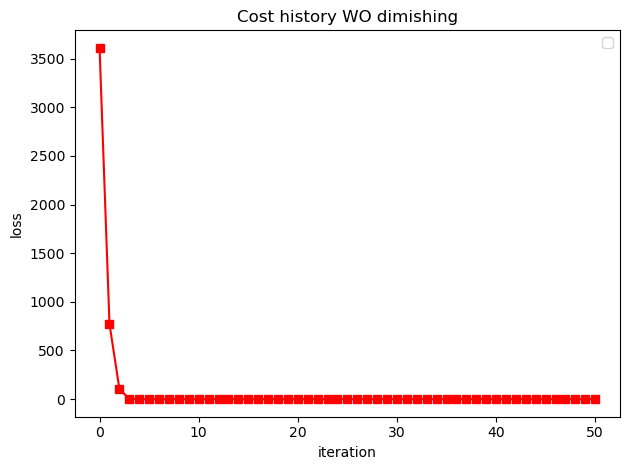

C:\Users\86186\AppData\Local\Temp\ipykernel_17816\1490242275.py:12: UserWarning: The following kwargs were not used by contour: 'level', 'color'
  plt.contour(x, y, z, level=2, color='y', alpha=0.2, zorder=1)


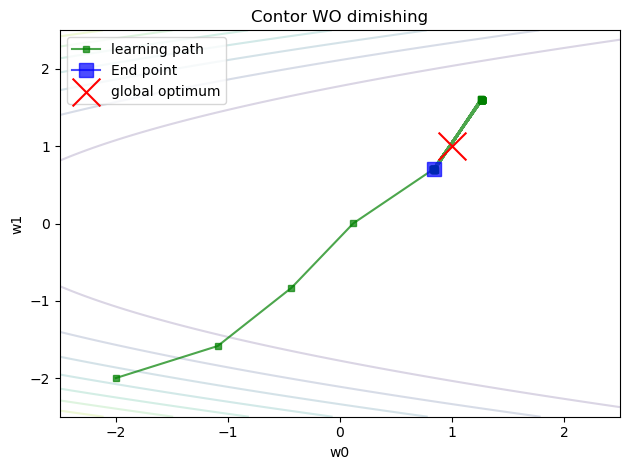

In [15]:
# Train without dimishing
w = np.array([-2, -2])
K = 50
P = 1000
losses = [loss(w)]
ws = [w]
for k in range(1, K+1):
    w, loss_val = step(w, P)
    ws.append(w)
    losses.append(loss_val)





ax = plt.subplot()
plot_hist(np.arange(K+1), losses, "Cost history WO dimishing")
ax = plt.subplot()
plot_countor(np.array([w[0] for w in ws]), np.array([w[1] for w in ws]), "Contor WO dimishing")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


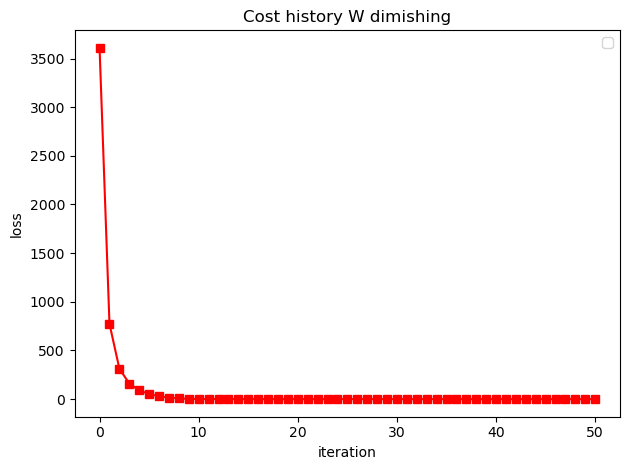

C:\Users\86186\AppData\Local\Temp\ipykernel_17816\1490242275.py:12: UserWarning: The following kwargs were not used by contour: 'level', 'color'
  plt.contour(x, y, z, level=2, color='y', alpha=0.2, zorder=1)


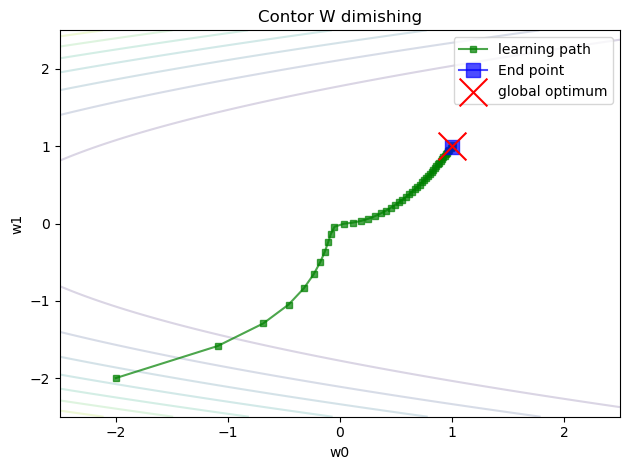

In [16]:
# Train with dimishing
w = np.array([-2, -2])
K = 50
P = 1000
losses = [loss(w)]
ws = [w]
for k in range(1, K+1):
    w, loss_val = step(w, P, k)
    ws.append(w)
    losses.append(loss_val)

ax = plt.subplot()
plot_hist(np.arange(K+1), losses, "Cost history W dimishing")
ax = plt.subplot()
plot_countor(np.array([w[0] for w in ws]), np.array([w[1] for w in ws]), "Contor W dimishing")


# Exercise 2.8. Coordinate search applied to minimize a simple quadratic

In [17]:
# Loss function
def g(w):
    return np.square(w).sum(0) + 2


# zero order coordinate search
def coordinate_search(g,alpha,max_its,w):
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=1)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    for k in range(1,max_its+1):                    
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        ## TO DO


        cands = w + alpha * directions
        # evaluate all candidates
        ## TO DO
        cand_val = g(cands)

        # if we find a real descent direction take the step in its direction
         ## TO DO 
        w = cands[:, np.argmin(cand_val):np.argmin(cand_val)+1]

    # record weights and cost evaluation
    weight_history.append(w.squeeze())
    cost_history.append(g(w).item())


    return weight_history,cost_history

Now compare 5 steps of the random search algorithm (with $P = 1000$ random directions tested at each step) to 7 steps of coordinate search, using the same starting point $\mathbf{w}^0 = \begin{bmatrix}3 \\ 4\end{bmatrix}$ and fixed steplength parameter value $\alpha = 1$ for both.  

The test function in this case is the simple quadratic used in several of the examples of the previous Section

\begin{equation}
g(w_0,w_1) = w_0^2 + w_1^2 + 2.
\end{equation}

In [18]:
# Random search
w = np.array([3, 4])
rand_ws = [w]
rand_loss_val = [g(w)]
for k in range(1, 6):
    w, loss_val = step(w, 1000, g=g)
    rand_ws.append(w)
    rand_loss_val.append(loss_val)

In [19]:
# Coordinate search
w = np.array([[3], [4]])
co_ws, co_loss_val = coordinate_search(g, 1, 7, w)

In [20]:
# Plot history curve
def plot_hist(x, y, title=None, shape='s-', color='r', label=None):
    plt.plot(x, y, shape, color = color, label=label)
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.title(title)
    plt.legend(loc='best')



# Plot contour graph
def plot_countor(w0, w1, w2, w3, title):
    N = 1000
    x = np.linspace(-2.5, 2.5, N)
    y = np.linspace(-2.5, 2.5, N)


    z = np.zeros((N, N))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            z[i, j] = loss([x.item(i), y.item(j)]) / 100
    plt.contour(x, y, z, level=2, alpha=0.2, zorder=1)
    plt.plot(w0, w1, 's-', color='g', label = 'random search learning path', markersize=4, alpha=0.7, zorder=2)
    plt.plot(w2, w3, 's-', color='c', label = 'coordinate search learning path', markersize=4, alpha=0.7, zorder=4)

    plt.scatter(0, 0, 400, 'r', marker='x', label = 'global optimum', zorder=6)
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.title(title)
    plt.legend(loc='best')


g:\anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


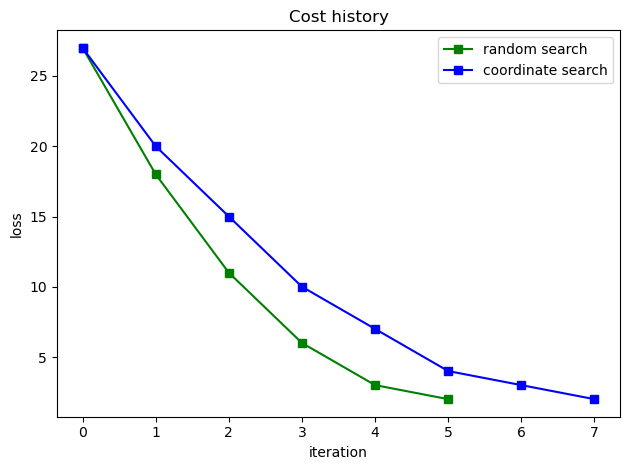

In [21]:
# Plot history graph
ax = plt.subplot()
plot_hist(np.arange(6), rand_loss_val, "Cost history", color="g", label="random search")
plot_hist(np.arange(8), co_loss_val, "Cost history", color="b",  label="coordinate search")

g:\anaconda\lib\site-packages\autograd\numpy\numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)
C:\Users\86186\AppData\Local\Temp\ipykernel_17816\363465901.py:22: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contour(x, y, z, level=2, alpha=0.2, zorder=1)


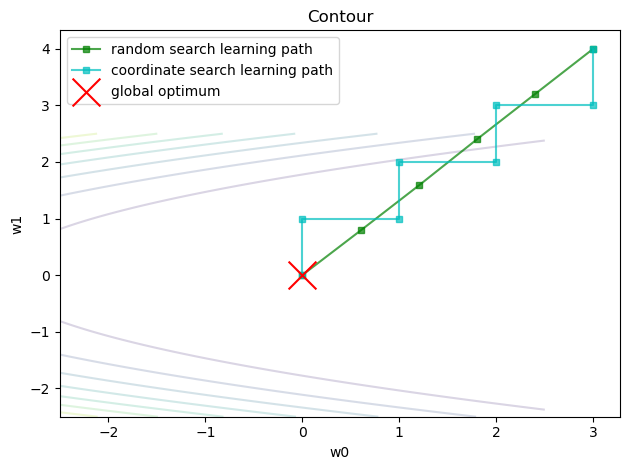

In [22]:
# Plot contour graph
ax = plt.subplot()
plot_countor(np.array([w[0] for w in rand_ws]), np.array([w[1] for w in rand_ws]), np.array([w[0] for w in co_ws]), np.array([w[1] for w in co_ws]), "Contour", )
